# DU-GD法 (二次関数)

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [316]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### 準備 (グローバル定数の設定)

In [317]:
n = 100
num_itr = 30
train_itr = 25
K = 50
adam_lr = 1e-3
max_inner = 20 

20

In [318]:
A = diagm(1:n)
λmin = 1
λmax = n
ηopt = 2/(λmin + λmax)

0.019801980198019802

### 固定ステップサイズのGD法のMSE

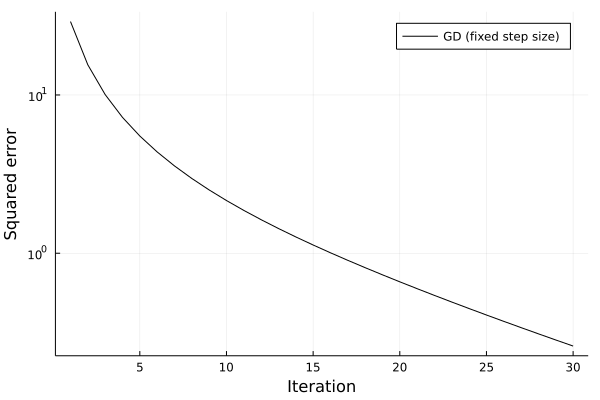

In [319]:
function GD(max_itr, x0)
    x = x0
    for i in 1:max_itr
        x = x - ηopt*A*x
    end
    return x
end

function comp_se(max_itr,x0)
    x̂ = GD(max_itr, x0)
    return norm(x̂)^2
end

xinit = randn(n)
GD_mse = [comp_se(i,xinit) for i in 1:num_itr]
plot(1:num_itr, GD_mse, lw=1, yscale=:log10, label="GD (fixed step size)", color=:black,  xlabel="Iteration", ylabel="Squared error")


### DU-GD反復の定義 

In [320]:
function DU_GD(max_itr, x0, η, T)
    x = x0
    for i in 0:max_itr-1
        k = (i % T)+1
        x = x - η[k]*A*x
    end
    return x
end

DU_GD (generic function with 1 method)

### 損失関数の定義

In [321]:
function loss(x̂)
    return norm(x̂)^2/K
end     

loss (generic function with 2 methods)

### 訓練関数の定義

In [322]:
function train(opt, η, T, train_itr)
    ps = params(η) 
    for itr in 1:train_itr
        for i in 1:max_inner
            x0 = randn(n,K)
            gs = gradient(ps) do
                x_est = DU_GD(itr, x0, η, T)
                loss(x_est)
            end
            Flux.Optimise.update!(opt, ps, gs)
        end
        x0 = randn(n,K)
        x_est = DU_GD(itr, x0, η, T)
        println(itr, " ", loss(x_est))
    end
end

train (generic function with 2 methods)

### DU-GDの誤差評価用関数

In [323]:
function comp_se_DUGD(max_itr, x0, η, T)
    x_est = DU_GD(max_itr, x0, η, T)
    return loss(x_est)
end

comp_se_DUGD (generic function with 1 method)

### 学習過程

1 25.057438095396314
2 13.8343171253268
3 8.752880204690946
4 5.135997874136151
5 4.3898996254190354
6 3.3915857781682446
7 2.296727488376169
8 2.116014282346641
9 1.690213491264887
10 1.1016456415459446
11 0.9281872821158433
12 0.7812947031836492
13 0.8120974064196658
14 0.8170160815061317
15 0.5930256679057
16 0.4854085106000092
17 0.41324183674654136
18 0.35582059747981704
19 0.3558392723921381
20 0.3463951559360556
21 0.2681557552255398
22 0.282611867883673
23 0.2737419784308728
24 0.14835493772308006
25 0.2319664923915439


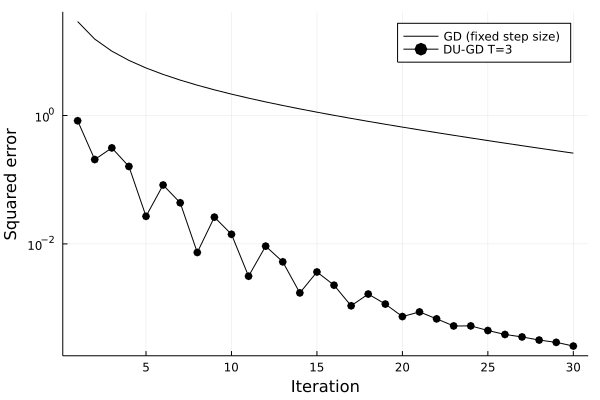

In [324]:
T = 3
η_train = zeros(num_itr) 
opt = ADAM(adam_lr) 
train(opt, η_train, T, train_itr)
DUGD_mse =[comp_se_DUGD(i, xinit, η_train, T) for i in 1:num_itr]
opt_param1 = [η_train[(i%T)+1] for i in 0:num_itr-1]
plot!(1:num_itr, DUGD_mse, lw=1, label="DU-GD T="*string(T), color=:black, marker=:o)

In [325]:
savefig("DU-GD-Quadratic.pdf")

### 最適パラメータのプロット

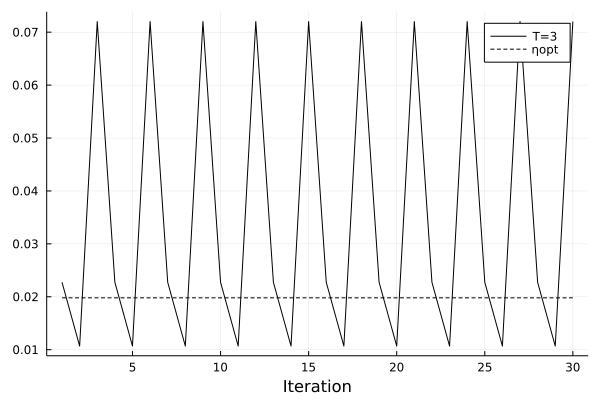

In [326]:
plot(1:num_itr, opt_param1, lw=1, label="T=3", color=:black, ls=:solid, xlabel="Iteration")
plot!(1:num_itr, x->ηopt, lw=1, label="ηopt", color=:black, ls=:dash)

In [327]:
savefig("DU-GD-Quadratic-param.pdf")